# Data 

In [1]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
from os import listdir
import numpy as np
import pandas as pd
import re
from difflib import SequenceMatcher

In [2]:
trainingpath1 = 'E:/JHU/课程/datadesign/NLP/data/training-RiskFactors-Complete-Set1'
trainingpath2 = 'E:/JHU/课程/datadesign/NLP/data/training-RiskFactors-Complete-Set2'
trainingpath = [trainingpath1, trainingpath2] # path list #script to read multi-paths need to be updated

In [3]:
def read_xml(path,file):
    tree = ET.parse(path+'/'+file)
    root = tree.getroot()
    text = root.find('TEXT').text
    return text

In [4]:
#dataset = []
corpus = pd.DataFrame(columns=['PatientID','TimeID','RawText','TagCategory','Rawtag','CleanedText','AnnotatedText','Tag_doc','Real_text_tag'])


In [5]:
#if path is one path
patientID = []
timeID = []
rawText = []
tagCategories = []
rawtag = []
annotatedText = []
tag_text = []


for file in os.listdir(trainingpath1):
    #read the text part of xml file
    text = read_xml(trainingpath1,file)
    #print(text)

    #save the PatientID, TimeID to the first two columns
    patientID.append(file.split('-')[0])
    timeID.append(file.split('-')[1].split('.')[0])
    #save the text to the third column
    rawText.append(text)

    #read the tags part of xml file
    tree = ET.parse(trainingpath1+'/'+file)
    root = tree.getroot()
    tags = root.findall('TAGS') 
    #save the tags to the fourth and fifth column
    for tag in tags: #<TAGS>
        
        tagcategory_eachfile = []
        rawtag_attrib_eachfile =[]
        tag_text_eachfile = []

        for child in tag:
            #print(child.tag)
            if child.tag != 'PHI':
                tagcategory_eachfile.append(child.tag) #save the tag category of each file to the a list
                for subchild in child:
                    #combine the subchild tag  and subchild attrib to a string
                    subchild_attrib = subchild.tag + ' ' + str(subchild.attrib)
                    #print(subchild_attrib)
                    rawtag_attrib_eachfile.append(subchild_attrib)
                    
                    if subchild.attrib.keys().__contains__('text'):
                        subchild_text = subchild.attrib['text']
                        subchild_text = subchild_text.strip()#remove the blank space in the text
                        #print(subchild_text)
                        subchild_tag = subchild.tag
        
                        tag_text_eachfile.append((subchild_text,subchild_tag))

        
        tagCategories.append(tagcategory_eachfile)           
        rawtag.append(rawtag_attrib_eachfile)
        annotatedText.append(tag_text_eachfile)

corpus['PatientID'] = patientID
corpus['TimeID'] = timeID
corpus['RawText'] = rawText
corpus['TagCategory'] = tagCategories
corpus['Rawtag'] = rawtag
corpus['AnnotatedText'] = annotatedText
#print(corpus)

'''
#convert the list in the column 'Rawtag_text' to string and between each element in the list, add a enter
for index,entry in enumerate(corpus['Rawtag_text']):
    corpus['Rawtag_text'][index] = '//'.join(entry)
'''
print(corpus['AnnotatedText'])

0      [(ZESTRIL, MEDICATION), (ZESTRIL, MEDICATION),...
1      [(Zestril, MEDICATION), (Zestril (LISINOPRIL),...
2      [(Zestril, MEDICATION), (Zestril, MEDICATION),...
3      [(Zestril (LISINOPRIL), MEDICATION), (Zestril,...
4      [(Zestril (LISINOPRIL), MEDICATION), (Zestril,...
                             ...                        
516    [(lisinopril, MEDICATION), (lisinopril, MEDICA...
517    [(Lisinopril, MEDICATION), (Lisinopril, MEDICA...
518    [(norvasc, MEDICATION), (norvasc, MEDICATION),...
519    [(Lipitor, MEDICATION), (Lipitor, MEDICATION),...
520    [(Simvastatin, MEDICATION), (Simvastatin, MEDI...
Name: AnnotatedText, Length: 521, dtype: object


In [6]:
#clean the text

cleanedText = []


for index,entry in enumerate(corpus['RawText']):
    #change some special characters
    entry = re.sub('<','&lt;',entry)
    entry = re.sub('>','&gt;',entry)
    entry = re.sub('"',"'",entry)
    #remove the blank lines
    entry = re.sub('\n',' ',entry)
    entry = re.sub('\t',' ',entry)
    #remove the extra space
    entry = re.sub(r'\s+',' ',entry)
    #remove the extra space in the beginning and the end
    #entry = entry.strip()
    #change the text to lower case
    #entry = entry.lower()
    #save the cleaned text to the sixth column
    cleanedText.append(entry)

corpus['CleanedText'] = cleanedText
print(cleanedText[0])

 Record date: 2067-05-03 Narrative History 55 yo woman who presents for f/u Seen in Cardiac rehab locally last week and BP 170/80. They called us and we increased her HCTZ to 25 mg from 12.5 mg. States her BP's were fine there since - 130-140/70-80. Saw Dr Oakley 4/5/67 - she was happy with results of ETT at Clarkfield. To f/u 7/67. No CP's since last admit. Back to work and starting to walk. No wt loss and discouraged by this, but just starting to exercise. No smoking for 3 months now! Still with hotflashes, wakes her up at night. Problems FH breast cancer 37 yo s FH myocardial infarction mother died 66 yo Hypertension Uterine fibroids u/s 2062 Smoking hyperlipidemia CRF mild chol, cigs, HTN, Fhx and known hx CAD in pt. borderline diabetes mellitus 4/63 125 , follow hgbaic VPB 2065 - ETT showed freq PVC coronary artery disease s/p ant SEMI + stent LAD 2/67, Dr Oakley thyroid nodule 2065, hot, follow TSH. Medications NORVASC (AMLODIPINE) 5MG 1 Tablet(s) PO QD PLAVIX (CLOPIDOGREL) 75 MG

In [7]:
for index,entry in enumerate(corpus['TagCategory']):
    tag_doc = []
    for i in range(len(entry)):
        #just keep the unique tag category, store in doc-level tag
        corpus['Tag_doc'][index] = list(set(entry))
print(corpus['Tag_doc'][0])

['HYPERTENSION', 'FAMILY_HIST', 'HYPERLIPIDEMIA', 'SMOKER', 'MEDICATION', 'CAD']


In [188]:
#save the corpus to a csv file
corpus.to_csv('E:/JHU/课程/datadesign/NLP/machine_learning/corpus.csv',index=False,encoding='utf-8')

# Trainingset

## tagger

In [8]:
print(corpus['AnnotatedText'])

0      [(ZESTRIL, MEDICATION), (ZESTRIL, MEDICATION),...
1      [(Zestril, MEDICATION), (Zestril (LISINOPRIL),...
2      [(Zestril, MEDICATION), (Zestril, MEDICATION),...
3      [(Zestril (LISINOPRIL), MEDICATION), (Zestril,...
4      [(Zestril (LISINOPRIL), MEDICATION), (Zestril,...
                             ...                        
516    [(lisinopril, MEDICATION), (lisinopril, MEDICA...
517    [(Lisinopril, MEDICATION), (Lisinopril, MEDICA...
518    [(norvasc, MEDICATION), (norvasc, MEDICATION),...
519    [(Lipitor, MEDICATION), (Lipitor, MEDICATION),...
520    [(Simvastatin, MEDICATION), (Simvastatin, MEDI...
Name: AnnotatedText, Length: 521, dtype: object


In [9]:
train = pd.DataFrame(np.zeros((len(corpus['AnnotatedText']), 2), dtype=object), columns=['text', 'annotation'])

for index,entry in enumerate(corpus['AnnotatedText']):
    train['text'][index] = corpus['CleanedText'][index]
    
    entry = list(set(entry))
    entry = [list(x) for x in entry]
    for i in range(len(entry)):
 
        entry[i][0] = re.sub(r'\s+',' ',entry[i][0])
    
    train['annotation'][index] = entry

    


print(train.head())

                                                text  \
0   Record date: 2067-05-03 Narrative History 55 ...   
1   Record date: 2068-12-05 Narrative History Pat...   
2   Record Date: 2070-12-01 Narrative History Pat...   
3   Record date: 2072-07-27 Narrative History Pat...   
4   Record date: 2075-01-31 Narrative History Pat...   

                                          annotation  
0  [[No smoking for 3 months now!, SMOKER], [know...  
1  [[Zestril (LISINOPRIL), MEDICATION], [Hyperlip...  
2  [[Zestril (LISINOPRIL), MEDICATION], [Hyperlip...  
3  [[Zestril (LISINOPRIL), MEDICATION], [s/p ant ...  
4  [[Zestril (LISINOPRIL), MEDICATION], [s/p ant ...  


In [10]:
def matcher(string, pattern):
    '''
    Return the start and end index of any pattern present in the text.
    '''
    match_list = []
    pattern = pattern.strip()
    seqMatch = SequenceMatcher(None, string, pattern, autojunk=False)
    match = seqMatch.find_longest_match(0, len(string), 0, len(pattern))
    if (match.size == len(pattern)):
        start = match.a
        end = match.a + match.size
        match_tup = (start, end)
        string = string.replace(pattern, "X" * len(pattern), 1)
        match_list.append(match_tup)
        
    return match_list, string


def mark_sentence(s, match_list):
    '''
    Marks all the entities in the sentence as per the BIO scheme. 
    '''
    word_dict = {}
    for word in s.split():
        word_dict[word] = 'O'
        
    for start, end, e_type in match_list:
        temp_str = s[start:end]
        tmp_list = temp_str.split()
        if len(tmp_list) > 1:
            #word_dict[tmp_list[0]] = 'B-' + e_type
            word_dict[tmp_list[0]] = e_type
            for w in tmp_list[1:]:
                #word_dict[w] = 'I-' + e_type
                word_dict[w] = e_type
        else:
            #word_dict[temp_str] = 'B-' + e_type
            word_dict[temp_str] = e_type
    return word_dict

## replace !!mark_sentence!! to better label the text with more than one word
def create_labs(s,match_list):
    labs = ['O' for i in range(len(s.split()))]
    word_dict = pd.DataFrame({'word':s.split(),'label':labs})

    for start, end, e_type in match_list:
        index = len(re.findall(r' +',s[0:start]))-1
        num_words = len(s[start:end].split())

        if num_words > 1:
            #word_dict.loc[index,'label'] = 'B-' + e_type
            word_dict.loc[index,'label'] = e_type
            for i in range(1,num_words):
                #word_dict.loc[index+i,'label'] = 'I-' + e_type
                word_dict.loc[index+i,'label'] = e_type
        else:
            #word_dict.loc[index,'label'] = 'B-' + e_type
            word_dict.loc[index,'label'] = e_type
    return word_dict

def create_data(df,corpus):
    '''
    The function responsible for the creation of data in the said format.
    '''

    n=0
    for text, annotation in zip(df.text, df.annotation): 
      
        print(df.index[df['text']== text].tolist())    
        match_list = []
        for i in annotation: 
            a, text_ = matcher(text, i[0])
            match_list.append((a[0][0], a[0][1], i[1]))
        
        d = create_labs(text, match_list)

        word_label = []
        for i in range(d.shape[0]):
            #print(d['word'][i] + ' ' + d['label'][i] +'\n')
            word_label.append(d['word'][i] + ' ' + d['label'][i])

        corpus['Real_text_tag'][n] = word_label
        n += 1



In [11]:
data = train.copy()
create_data(data,corpus)

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87]
[88]
[89]
[90]
[91]
[92]
[93]
[94]
[95]
[96]
[97]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[106]
[107]
[108]
[109]
[110]
[111]
[112]
[113]
[114]
[115]
[116]
[117]
[118]
[119]
[120]
[121]
[122]
[123]
[124]
[125]
[126]
[127]
[128]
[129]
[130]
[131]
[132]
[133]
[134]
[135]
[136]
[137]
[138]
[139]
[140]
[141]
[142]
[143]
[144]
[145]
[146]
[147]
[148]
[149]
[150]
[151]
[152]
[153]
[154]
[155]
[156]
[157]
[158]
[159]
[160]
[161]
[162]
[163]
[164]
[165]
[166]
[167]
[168]
[169]
[170]
[171]
[172]
[173]
[174]
[175]
[176]
[177]
[178]
[179]
[180]
[181]
[182]
[183]
[184]


In [132]:
#save the corpus to a csv file
corpus.to_csv('E:/JHU/课程/datadesign/NLP/machine_learning/corpus.csv',index=False,encoding='utf-8')

In [133]:
corpus['Real_text_tag'][0]

['Record O',
 'date: O',
 '2106-02-12 O',
 'Campbell O',
 'Orthopedic O',
 'Associates O',
 '4 O',
 'Madera O',
 'Circle O',
 'Omak, O',
 'GA O',
 '28172 O',
 'Habib O',
 'Valenzuela, O',
 'M.D. O',
 'Valdez, O',
 'Harlan O',
 'Jr. O',
 '845-41-54-4 O',
 'February O',
 '12, O',
 '2106 O',
 'Har O',
 'is O',
 'a O',
 '43 O',
 'year O',
 'old O',
 "6' O",
 '214 O',
 'pound O',
 'gentleman O',
 'who O',
 'is O',
 'referred O',
 'for O',
 'consultation O',
 'by O',
 'Dr. O',
 'Harlan O',
 'Oneil. O',
 'About O',
 'a O',
 'week O',
 'ago O',
 'he O',
 'slipped O',
 'on O',
 'the O',
 'driveway O',
 'at O',
 'home O',
 'and O',
 'sustained O',
 'an O',
 'injury O',
 'to O',
 'his O',
 'left O',
 'ankle. O',
 'He O',
 'was O',
 'seen O',
 'at O',
 'Tri-City O',
 'Hospital O',
 'and O',
 'was O',
 'told O',
 'he O',
 'had O',
 'a O',
 'fracture. O',
 'He O',
 'was O',
 'placed O',
 'in O',
 'an O',
 'air O',
 'splint O',
 'and O',
 'advised O',
 'to O',
 'be O',
 'partial O',
 'weight O',
 'be

## Traininglist

In [134]:
traininglist = pd.DataFrame(columns=['file','text', 'label'])
for index,entry in enumerate(corpus['Real_text_tag']):
    trainingsublist = pd.DataFrame(np.zeros((len(entry), 3), dtype=object), columns=['file','text', 'label'])
    #print(len(entry))
    #print(entry[34].split())
    
    #make the text and label into two columns, and then concat them together
    for i in range(len(entry)):
        trainingsublist['text'][i] = entry[i].split()[0]
        trainingsublist['label'][i] = entry[i].split()[1]
    trainingsublist['file'] = index+1
    traininglist = pd.concat([traininglist,trainingsublist],axis=0)

print(traininglist)


     file        text label
0       1      Record     O
1       1       date:     O
2       1  2106-02-12     O
3       1    Campbell     O
4       1  Orthopedic     O
...   ...         ...   ...
1044  269    Document     O
1045  269     Status:     O
1046  269       Final     O
1047  269        with     O
1048  269    Addendum     O

[152543 rows x 3 columns]


In [135]:
traininglist.groupby('label').count().sort_values(by='text',ascending=False)

,file,text
label,,
O,146631,146631
CAD,1743,1743
MEDICATION,1503,1503
SMOKER,793,793
HYPERTENSION,722,722
DIABETES,711,711
HYPERLIPIDEMIA,170,170
FAMILY_HIST,167,167
OBESE,103,103


# Testingset

In [136]:
testingpath = 'E:/JHU/课程/datadesign/NLP/data/testing-RiskFactors-Complete'

In [137]:
corpus_test = pd.DataFrame(columns=['PatientID','TimeID','RawText','TagCategory','Rawtag','CleanedText','AnnotatedText','Real_text_tag','Pred_text_tag','Real_tag_doc','Pred_tag_doc'])

In [138]:
patientID = []
timeID = []
rawText = []
tagCategories = []
rawtag = []
annotatedText = []
tag_text = []


for file in os.listdir(testingpath):
    #read the text part of xml file
    text = read_xml(testingpath,file)
    #print(text)

    #save the PatientID, TimeID to the first two columns
    patientID.append(file.split('-')[0])
    timeID.append(file.split('-')[1].split('.')[0])
    #save the text to the third column
    rawText.append(text)

    #read the tags part of xml file
    tree = ET.parse(testingpath+'/'+file)
    root = tree.getroot()
    tags = root.findall('TAGS') 
    #save the tags to the fourth and fifth column
    for tag in tags: #<TAGS>
        
        tagcategory_eachfile = []
        rawtag_attrib_eachfile =[]
        tag_text_eachfile = []

        for child in tag:
            #print(child.tag)
            if child.tag != 'PHI':
                tagcategory_eachfile.append(child.tag) #save the tag category of each file to the a list
                for subchild in child:
                    #combine the subchild tag  and subchild attrib to a string
                    subchild_attrib = subchild.tag + ' ' + str(subchild.attrib)
                    #print(subchild_attrib)
                    rawtag_attrib_eachfile.append(subchild_attrib)
                    
                    if subchild.attrib.keys().__contains__('text'):
                        subchild_text = subchild.attrib['text']
                        subchild_text = subchild_text.strip()#remove the blank space in the text
                        #print(subchild_text)
                        subchild_tag = subchild.tag
        
                        tag_text_eachfile.append((subchild_text,subchild_tag))

        
        tagCategories.append(tagcategory_eachfile)           
        rawtag.append(rawtag_attrib_eachfile)
        annotatedText.append(tag_text_eachfile)

corpus_test['PatientID'] = patientID
corpus_test['TimeID'] = timeID
corpus_test['RawText'] = rawText
corpus_test['TagCategory'] = tagCategories
corpus_test['Rawtag'] = rawtag
corpus_test['AnnotatedText'] = annotatedText
#print(corpus)

'''
#convert the list in the column 'Rawtag_text' to string and between each element in the list, add a enter
for index,entry in enumerate(corpus['Rawtag_text']):
    corpus['Rawtag_text'][index] = '//'.join(entry)
'''
print(corpus_test['AnnotatedText'])

0      [(aspirin, MEDICATION), (aspirin, MEDICATION),...
1      [(Hypertension, HYPERTENSION), (Hypertension, ...
2      [(Hyperlipidemia, HYPERLIPIDEMIA), (Hyperlipid...
3      [(hyperlipidemia, HYPERLIPIDEMIA), (hyperlipid...
4      [(Zestril,, MEDICATION), (Zestril, MEDICATION)...
                             ...                        
509    [(Hyperlipidemia, HYPERLIPIDEMIA), (Hyperlipid...
510                                   [(Record, SMOKER)]
511    [(Simvastatin, MEDICATION), (Simvastatin, MEDI...
512    [(Zocor, MEDICATION), (Zocor, MEDICATION), (Zo...
513    [(hyperlipidemia, HYPERLIPIDEMIA), (hyperlipid...
Name: AnnotatedText, Length: 514, dtype: object


In [139]:
#clean the text

cleanedText = []


for index,entry in enumerate(corpus_test['RawText']):
    #change some special characters
    entry = re.sub('<','&lt;',entry)
    entry = re.sub('>','&gt;',entry)
    entry = re.sub('"',"'",entry)
    #remove the blank lines
    entry = re.sub('\n',' ',entry)
    entry = re.sub('\t',' ',entry)
    #remove the extra space
    entry = re.sub(r'\s+',' ',entry)
    #remove the extra space in the beginning and the end
    #entry = entry.strip()
    #change the text to lower case
    #entry = entry.lower()
    #save the cleaned text to the sixth column
    cleanedText.append(entry)

corpus_test['CleanedText'] = cleanedText
print(cleanedText[0])

 Record date: 2069-04-07 Mr. Villegas is seen today. I have not seen him since November. About three weeks ago he stopped his Prednisone on his own because he was gaining weight. He does feel that his shoulders are definitely improved. It is unclear what he is actually taking, but I think based on the color of his pills and the timing of the medication that he continues taking his Atenolol for hypertension and 1 Hydroxychloroquine tablet. He is concerned because of the relatively recent onset of difficulties turning his head to the right. When he does this, he will note that he feels as though he is going to pass out although this has not actually happened. This only occurs when he turns to the right and not to the left. He has no visual changes otherwise and denies any headache or other cranial complaints. On examination today, BP 120/80. He has no bruits over the carotid. He has no tenderness in this region either. He has good peripheral pulses at the arms. His joint examination is m

In [140]:
for index,entry in enumerate(corpus_test['TagCategory']):
    tag_doc = []
    for i in range(len(entry)):
        #just keep the unique tag category, store in doc-level tag
        corpus_test['Real_tag_doc'][index] = list(set(entry))
print(corpus_test['Real_tag_doc'][0])

['SMOKER', 'FAMILY_HIST', 'MEDICATION', 'HYPERTENSION']


In [141]:
test = pd.DataFrame(np.zeros((len(corpus_test['AnnotatedText']), 2), dtype=object), columns=['text', 'annotation'])

for index,entry in enumerate(corpus_test['AnnotatedText']):
    test['text'][index] = corpus_test['CleanedText'][index]
    
    entry = list(set(entry))
    entry = [list(x) for x in entry]
    for i in range(len(entry)):
 
        entry[i][0] = re.sub(r'\s+',' ',entry[i][0])
    
    test['annotation'][index] = entry

    


print(test.head())

                                                text  \
0   Record date: 2069-04-07 Mr. Villegas is seen ...   
1   Record date: 2075-01-07 NAME: Villegas, Yosef...   
2   Record date: 2080-02-18 SDU JAR Admission Not...   
3   Record date: 2080-10-01 Reason for Visit Ster...   
4   Record date: 2083-07-20 SILVER RIDGE EMERGENC...   

                                          annotation  
0  [[Record, SMOKER], [aspirin, MEDICATION], [hyp...  
1  [[142/74., HYPERTENSION], [cut back his cigare...  
2  [[Smokes, SMOKER], [Obese, OBESE], [hctz, MEDI...  
3  [[Record, SMOKER], [CABG, CAD], [Hctz, MEDICAT...  
4  [[hypertension, HYPERTENSION], [insulin, MEDIC...  


In [142]:
testdata = test.copy()
create_data(testdata,corpus_test)

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87]
[88]
[89]
[90]
[91]
[92]
[93]
[94]
[95]
[96]
[97]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[106]
[107]
[108]
[109]
[110]
[111]
[112]
[113]
[114]
[115]
[116]
[117]
[118]
[119]
[120]
[121]
[122]
[123]
[124]
[125]
[126]
[127]
[128]
[129]
[130]
[131]
[132]
[133]
[134]
[135]
[136]
[137]
[138]
[139]
[140]
[141]
[142]
[143]
[144]
[145]
[146]
[147]
[148]
[149]
[150]
[151]
[152]
[153]
[154]
[155]
[156]
[157]
[158]
[159]
[160]
[161]
[162]
[163]
[164]
[165]
[166]
[167]
[168]
[169]
[170]
[171]
[172]
[173]
[174]
[175]
[176]
[177]
[178]
[179]
[180]
[181]
[182]
[183]
[184]


In [143]:
corpus_test['Real_text_tag'][0]

['Record SMOKER',
 'date: O',
 '2069-04-07 O',
 'Mr. O',
 'Villegas O',
 'is O',
 'seen O',
 'today. O',
 'I O',
 'have O',
 'not O',
 'seen O',
 'him O',
 'since O',
 'November. O',
 'About O',
 'three O',
 'weeks O',
 'ago O',
 'he O',
 'stopped O',
 'his O',
 'Prednisone O',
 'on O',
 'his O',
 'own O',
 'because O',
 'he O',
 'was O',
 'gaining O',
 'weight. O',
 'He O',
 'does O',
 'feel O',
 'that O',
 'his O',
 'shoulders O',
 'are O',
 'definitely O',
 'improved. O',
 'It O',
 'is O',
 'unclear O',
 'what O',
 'he O',
 'is O',
 'actually O',
 'taking, O',
 'but O',
 'I O',
 'think O',
 'based O',
 'on O',
 'the O',
 'color O',
 'of O',
 'his O',
 'pills O',
 'and O',
 'the O',
 'timing O',
 'of O',
 'the O',
 'medication O',
 'that O',
 'he O',
 'continues O',
 'taking O',
 'his O',
 'Atenolol MEDICATION',
 'for O',
 'hypertension HYPERTENSION',
 'and O',
 '1 O',
 'Hydroxychloroquine O',
 'tablet. O',
 'He O',
 'is O',
 'concerned O',
 'because O',
 'of O',
 'the O',
 'relative

In [144]:
testinglist = pd.DataFrame(columns=['file','text', 'label'])
for index,entry in enumerate(corpus_test['Real_text_tag']):
    testingsublist = pd.DataFrame(np.zeros((len(entry), 3), dtype=object), columns=['file','text', 'label'])
    #print(len(entry))
    #print(entry[34].split())
    
    #make the text and label into two columns, and then concat them together
    for i in range(len(entry)):
        testingsublist['text'][i] = entry[i].split()[0]
        testingsublist['label'][i] = entry[i].split()[1]
    testingsublist['file'] = index+1
    testinglist = pd.concat([testinglist,testingsublist],axis=0)

print(testinglist)

    file        text   label
0      1      Record  SMOKER
1      1       date:       O
2      1  2069-04-07       O
3      1         Mr.       O
4      1    Villegas       O
..   ...         ...     ...
707  514           4       O
708  514        Team       O
709  514           4       O
710  514      Beeper       O
711  514      #07736       O

[316213 rows x 3 columns]


In [145]:
testinglist.groupby('label').count().sort_values(by='text',ascending=False)

,file,text
label,,
O,302678,302678
MEDICATION,4141,4141
CAD,3945,3945
SMOKER,1656,1656
DIABETES,1653,1653
HYPERTENSION,1261,1261
HYPERLIPIDEMIA,497,497
FAMILY_HIST,214,214
OBESE,168,168


# Modelling

In [146]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

In [147]:
trainingtext = traininglist.drop(['file','label'],axis=1)
#print(trainingtext)
traininglabel = traininglist['label']

v = DictVectorizer(sparse=True)
x_train = v.fit_transform(trainingtext.to_dict('records'))
y_train = traininglabel

classes = np.unique(traininglabel)
classes = classes.tolist()

testingtext = testinglist.drop(['file','label'],axis=1)
testinglabel = testinglist['label']

x_test = v.transform(testingtext.to_dict('records'))
y_test = testinglabel

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((152543, 24723), (152543,), (316213, 24723), (316213,))

In [148]:
new_classes = classes.copy()
new_classes.remove('O')
new_classes

['CAD',
 'DIABETES',
 'FAMILY_HIST',
 'HYPERLIPIDEMIA',
 'HYPERTENSION',
 'MEDICATION',
 'OBESE',
 'SMOKER']

                precision    recall  f1-score   support

           CAD       0.40      0.05      0.09      3945
      DIABETES       0.60      0.35      0.44      1653
   FAMILY_HIST       0.00      0.00      0.00       214
HYPERLIPIDEMIA       0.72      0.41      0.52       497
  HYPERTENSION       0.61      0.34      0.44      1261
    MEDICATION       0.72      0.47      0.57      4141
         OBESE       0.64      0.57      0.60       168
        SMOKER       0.78      0.24      0.37      1656

     micro avg       0.66      0.28      0.40     13535
     macro avg       0.56      0.30      0.38     13535
  weighted avg       0.59      0.28      0.37     13535



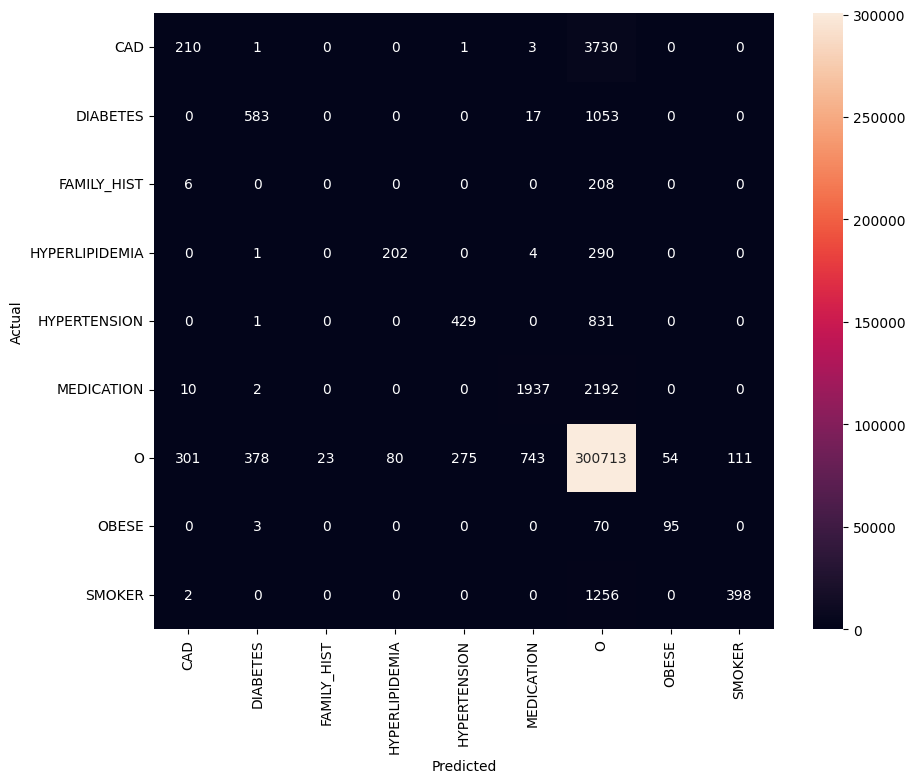

In [149]:
#Naive bayes
nb = MultinomialNB(alpha=.0005)
nb.partial_fit(x_train, y_train,classes=classes)

print (classification_report(y_pred=nb.predict(x_test), y_true=y_test, labels=new_classes))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

y_pred = nb.predict(x_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Prediction 

In [150]:
print(y_pred)

['O' 'O' 'O' ... 'O' 'O' 'O']


In [151]:
vadicationlist = testinglist.copy()
vadicationlist.insert(3, 'pred_label', '')

vadicationlist['pred_label'] = y_pred

vadicationlist.groupby('pred_label').count().sort_values(by='text',ascending=False)

,file,text,label
pred_label,,,
O,310343,310343,310343
MEDICATION,2704,2704,2704
DIABETES,969,969,969
HYPERTENSION,705,705,705
CAD,529,529,529
SMOKER,509,509,509
HYPERLIPIDEMIA,282,282,282
OBESE,149,149,149
FAMILY_HIST,23,23,23


In [152]:
vadicationlist['file']-1

0        0
1        0
2        0
3        0
4        0
      ... 
707    513
708    513
709    513
710    513
711    513
Name: file, Length: 316213, dtype: object

In [153]:
#group the vadicationlist by file
vadicationlist_grouped = vadicationlist.groupby('file')
vadicationlist_grouped_list = []
for name,group in vadicationlist_grouped:
    vadicationlist_grouped_list.append(group)

print(vadicationlist_grouped_list[0])

#delete the 'file' column
for i in range(len(vadicationlist_grouped_list)):
    vadicationlist_grouped_list[i] = vadicationlist_grouped_list[i].drop(['file'],axis=1)


    file        text   label pred_label
0      1      Record  SMOKER          O
1      1       date:       O          O
2      1  2069-04-07       O          O
3      1         Mr.       O          O
4      1    Villegas       O          O
..   ...         ...     ...        ...
290    1    reviewed       O          O
291    1          by       O          O
292    1   Attending       O          O
293    1    Provider       O          O
294    1    ********       O          O

[295 rows x 4 columns]


In [154]:
print(vadicationlist_grouped_list)

[           text   label pred_label
0        Record  SMOKER          O
1         date:       O          O
2    2069-04-07       O          O
3           Mr.       O          O
4      Villegas       O          O
..          ...     ...        ...
290    reviewed       O          O
291          by       O          O
292   Attending       O          O
293    Provider       O          O
294    ********       O          O

[295 rows x 3 columns],                    text label pred_label
0                Record     O          O
1                 date:     O          O
2            2075-01-07     O          O
3                 NAME:     O          O
4             Villegas,     O          O
..                  ...   ...        ...
196             Gilbert     O          O
197                  P.     O          O
198              Perez,     O          O
199                M.D.     O          O
200  GPP/church/olinger     O          O

[201 rows x 3 columns],            text label pred_label
0   

In [155]:
vadicationlist_grouped_list[0].shape

(295, 3)

In [156]:
Pred_text_tag = []
for i in range(len(vadicationlist_grouped_list)):
    Pred_text_tag_eachfile = []
    for j in range(len(vadicationlist_grouped_list[i])):
        Pred_text_tag_eachfile.append(vadicationlist_grouped_list[i]['text'][j]+' '+vadicationlist_grouped_list[i]['label'][j]+' '+vadicationlist_grouped_list[i]['pred_label'][j])
    Pred_text_tag.append(Pred_text_tag_eachfile)

In [157]:
print(len(Pred_text_tag[0]))
print(len(Pred_text_tag[1]))

295
201


In [158]:
corpus_test['Pred_text_tag'] = Pred_text_tag

In [159]:
corpus_test['Pred_text_tag'][0]

['Record SMOKER O',
 'date: O O',
 '2069-04-07 O O',
 'Mr. O O',
 'Villegas O O',
 'is O O',
 'seen O O',
 'today. O O',
 'I O O',
 'have O O',
 'not O O',
 'seen O O',
 'him O O',
 'since O O',
 'November. O O',
 'About O O',
 'three O O',
 'weeks O O',
 'ago O O',
 'he O O',
 'stopped O O',
 'his O O',
 'Prednisone O O',
 'on O O',
 'his O O',
 'own O O',
 'because O O',
 'he O O',
 'was O O',
 'gaining O O',
 'weight. O O',
 'He O O',
 'does O O',
 'feel O O',
 'that O O',
 'his O O',
 'shoulders O O',
 'are O O',
 'definitely O O',
 'improved. O O',
 'It O O',
 'is O O',
 'unclear O O',
 'what O O',
 'he O O',
 'is O O',
 'actually O O',
 'taking, O O',
 'but O O',
 'I O O',
 'think O O',
 'based O O',
 'on O O',
 'the O O',
 'color O O',
 'of O O',
 'his O O',
 'pills O O',
 'and O O',
 'the O O',
 'timing O O',
 'of O O',
 'the O O',
 'medication O O',
 'that O O',
 'he O O',
 'continues O O',
 'taking O O',
 'his O O',
 'Atenolol MEDICATION MEDICATION',
 'for O O',
 'hypertensio

In [162]:
#save the corpus to a csv file
corpus_test.to_csv('E:/JHU/课程/datadesign/NLP/machine_learning/corpus_test.csv',index=False,encoding='utf-8')

# Doc-level Prediction

In [163]:
Pred_doc_tag = []
#删除重复的tag
for i in range(len(vadicationlist_grouped_list)):
    Pred_doc_tag_eachfile = []
    for j in range(len(vadicationlist_grouped_list[i])):
        Pred_doc_tag_eachfile.append(vadicationlist_grouped_list[i]['pred_label'][j])
    Pred_doc_tag_eachfile = list(set(Pred_doc_tag_eachfile))
    Pred_doc_tag_eachfile.remove('O')
    Pred_doc_tag.append(Pred_doc_tag_eachfile)
#vadicationlist_grouped_list[0]['pred_label']

In [164]:
print(Pred_doc_tag[0])

['MEDICATION', 'HYPERTENSION']


In [165]:
corpus_test['Pred_tag_doc'] = Pred_doc_tag

In [166]:
#save the corpus to a csv file
corpus_test.to_csv('E:/JHU/课程/datadesign/NLP/machine_learning/corpus_test.csv',index=False,encoding='utf-8')

# Evaluation

In [167]:
Evaluation = pd.DataFrame(columns=['file','Real_tag_doc','Pred_tag_doc'])
Evaluation['file'] = corpus_test.index
Evaluation['Real_tag_doc'] = corpus_test['Real_tag_doc']
Evaluation['Pred_tag_doc'] = Pred_doc_tag

Evaluation

,file,Real_tag_doc,Pred_tag_doc
0,0,"[SMOKER, FAMILY_HIST, MEDICATION, HYPERTENSION]","[MEDICATION, HYPERTENSION]"
1,1,"[SMOKER, FAMILY_HIST, HYPERTENSION]","[SMOKER, MEDICATION, HYPERTENSION]"
2,2,"[OBESE, DIABETES, CAD, HYPERLIPIDEMIA, SMOKER,...","[OBESE, DIABETES, CAD, HYPERLIPIDEMIA, SMOKER,..."
3,3,"[OBESE, DIABETES, CAD, HYPERLIPIDEMIA, SMOKER,...","[DIABETES, CAD, HYPERLIPIDEMIA, MEDICATION, HY..."
4,4,"[DIABETES, SMOKER, FAMILY_HIST, MEDICATION, HY...","[DIABETES, MEDICATION, HYPERTENSION]"
...,...,...,...
509,509,"[DIABETES, HYPERLIPIDEMIA, SMOKER, FAMILY_HIST...","[DIABETES, HYPERLIPIDEMIA, SMOKER, MEDICATION,..."
510,510,"[SMOKER, FAMILY_HIST]",[]
511,511,"[DIABETES, SMOKER, FAMILY_HIST, MEDICATION, HY...","[DIABETES, SMOKER, MEDICATION, HYPERTENSION]"
512,512,"[DIABETES, SMOKER, FAMILY_HIST, MEDICATION]","[DIABETES, CAD, SMOKER, MEDICATION]"


In [168]:
Evaluation['Real_tag_doc'][0]

['SMOKER', 'FAMILY_HIST', 'MEDICATION', 'HYPERTENSION']

In [169]:
def evaluate_each(list, taget_tag):
    TP = 0
    FP = 0
    FN = 0
    for i in range(len(list)):
        if taget_tag in list['Real_tag_doc'][i]:
            if taget_tag in list['Pred_tag_doc'][i]:
                TP += 1
            else:
                FN += 1
        else:
            if taget_tag in list['Pred_tag_doc'][i]:
                FP += 1

    #print('TP:',TP)
    #print('FP:',FP)
    #print('FN:',FN)
    return TP,FP,FN

def evaluate_matrix(list, taget_tag_list = ['SMOKER', 'FAMILY_HIST']):
    
    score_matrix = pd.DataFrame(columns=['target_tag','TP','FP','FN','precision','recall','F1','Support'])

    for taget_tag in taget_tag_list:
        TP,FP,FN = evaluate_each(list, taget_tag)
        precision = TP/(TP+FP)
        recall = TP/(TP+FN)
        F1 = 2*precision*recall/(precision+recall)
        score_matrix = score_matrix.append({'target_tag':taget_tag,'TP':TP,'FP':FP,'FN':FN,'precision':precision,'recall':recall,'F1':F1, 'Support':TP},ignore_index=True)
    
    support_sum = score_matrix['Support'].sum()
    support_proportion = score_matrix['Support']/support_sum
    
    weighted_precision = (score_matrix['precision']*support_proportion).sum()
    weighted_recall = (score_matrix['recall']*support_proportion).sum()
    weighted_F1 = (score_matrix['F1']*support_proportion).sum()

    
    score_matrix = score_matrix.append({'target_tag':'Total_macro','TP':score_matrix['TP'].sum(),'FP':score_matrix['FP'].sum(),'FN':score_matrix['FN'].sum(),'precision':score_matrix['precision'].mean(),'recall':score_matrix['recall'].mean(),'F1':score_matrix['F1'].mean(), 'Support':support_sum},ignore_index=True)
    score_matrix = score_matrix.append({'target_tag':'Total_micro','TP':score_matrix['TP'].sum(),'FP':score_matrix['FP'].sum(),'FN':score_matrix['FN'].sum(),'precision':score_matrix['TP'].sum()/(score_matrix['TP'].sum()+score_matrix['FP'].sum()),'recall':score_matrix['TP'].sum()/(score_matrix['TP'].sum()+score_matrix['FN'].sum()),'F1':2*score_matrix['TP'].sum()/(2*score_matrix['TP'].sum()+score_matrix['FP'].sum()+score_matrix['FN'].sum()), 'Support':support_sum},ignore_index=True)
    score_matrix = score_matrix.append({'target_tag':'Total_weighted','TP':score_matrix['TP'].sum(),'FP':score_matrix['FP'].sum(),'FN':score_matrix['FN'].sum(),'precision':weighted_precision,'recall':weighted_recall,'F1':weighted_F1, 'Support':support_sum},ignore_index=True)
    
    #print(score_matrix)
    return score_matrix



In [170]:
Evaluate_Matrix = evaluate_matrix(Evaluation,taget_tag_list =['MEDICATION','CAD','DIABETES','SMOKER','HYPERTENSION','HYPERLIPIDEMIA','OBESE','FAMILY_HIST'])

C:\Users\52594\AppData\Local\Temp\ipykernel_53144\3505224371.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_matrix = score_matrix.append({'target_tag':taget_tag,'TP':TP,'FP':FP,'FN':FN,'precision':precision,'recall':recall,'F1':F1, 'Support':TP},ignore_index=True)
C:\Users\52594\AppData\Local\Temp\ipykernel_53144\3505224371.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_matrix = score_matrix.append({'target_tag':taget_tag,'TP':TP,'FP':FP,'FN':FN,'precision':precision,'recall':recall,'F1':F1, 'Support':TP},ignore_index=True)
C:\Users\52594\AppData\Local\Temp\ipykernel_53144\3505224371.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_matrix = score_matrix.append({'target_tag':taget_tag,'TP':T

In [171]:
print(Evaluate_Matrix)

        target_tag    TP   FP    FN  precision    recall        F1 Support
0       MEDICATION   444    5     7   0.988864  0.984479  0.986667     444
1              CAD   152   50    74   0.752475  0.672566  0.710280     152
2         DIABETES   315   23    49   0.931953  0.865385  0.897436     315
3           SMOKER   254    2   258   0.992188  0.496094  0.661458     254
4     HYPERTENSION   340   12    53   0.965909  0.865140  0.912752     340
5   HYPERLIPIDEMIA   194    6    55   0.970000  0.779116  0.864143     194
6            OBESE    72   15    15   0.827586  0.827586  0.827586      72
7      FAMILY_HIST    19    0   495   1.000000  0.036965  0.071295      19
8      Total_macro  1790  113  1006   0.928622  0.690916  0.741452    1790
9      Total_micro  3580  226  2012   0.940620  0.640200  0.761864    1790
10  Total_weighted  7160  452  4024   0.946474  0.806440  0.857914    1790
